[질문]
- 기상청 현재 날씨 정보 가져오기

table : <table class="table-col" id="weather_table">
<caption>도시별 기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.</caption>
<colgroup>
<col span="13" style="width:calc(100% / 13)"/>
</colgroup>
<thead>
<tr class="table_header tablesorter-ignoreRow" id="table_header1">
<th scope="col">	
										지점
										
									</th>
<th colspan="4" id="headers-weather" scope="col">날씨</th>
<th colspan="3" id="headers-temp" scope="col">기온(℃)</th>
<th colspan="3" id="headers-rain" scope="col">강수</th>
<th colspan="2" id="headers-wind" scope="col">바람</th>
<th id="headers-press" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th scope="col">
										이름
										
									</th>
<th headers="headers-weather" scope="col">현재일기 </th>
<th headers="headers-weather" scope="col">시정<br/>km</th>
<th headers="headers-weather" scope="col">운량<br/>1/10</th>
<th headers="headers-weather" scope="col">중하운량</th>
<th headers="headers-temp" scope="col">현재<br/>기온</th>
<th headers="headers-temp" s

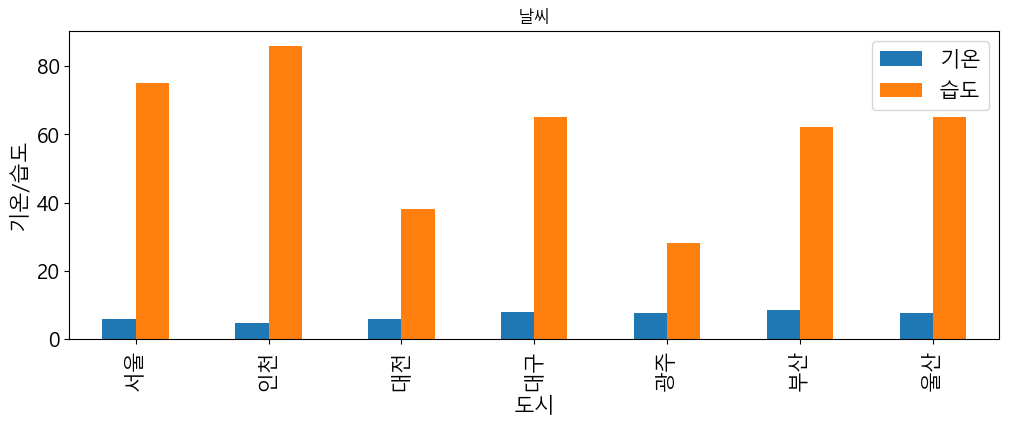

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt


source = requests.get('https://www.weather.go.kr/w/obs-climate/land/city-obs.do')
soup = BeautifulSoup(source.content,"html.parser")

table = soup.find('table',{'class':'table-col'})
print("table :", table)
data = []

print("#"*30)
print("\nHello! Here's today's weather!\n")
print("#"*30)

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temp = tds[5].text
            humidity = tds[10].text
            print("{0:<7} {1:<7} {2:<7}".format(point,temp,humidity))
            data.append([point,temp,humidity])

print("#"*30)
print("\nIt ends here. thanks!\n")
print("#"*30)
print("data : ")
print(data)

with open('weather.csv','w', encoding='utf-8') as f:
    f.write('지역, 온도, 습도\n')
    for i in data:
        print(i)
        f.write('{0},{1},{2}\n'.format(i[0],i[1],i[2]))

df = pandas.read_csv('weather.csv', index_col='지역' , encoding='utf-8')

city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]

font_name = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
mpl.rc('font',family=font_name)

ax = city_df.plot(kind='bar',title='날씨',figsize=(12,4),legend=True,fontsize=15)
ax.set_xlabel('도시',fontsize=15)
ax.set_ylabel('기온/습도',fontsize=15)
ax.legend(['기온','습도'],fontsize=15)

plt.show()

In [ ]:
#import requests
from bs4 import BeautifulSoup
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt


req = requests.get('https://www.weather.go.kr/w/obs-climate/land/city-obs.do')
soup = BeautifulSoup(req.text,"html.parser")

table = soup.find('table',{'class':'table-col'})
print("table :", table)
data = []

print("#"*30)
print("\nHello! Here's today's weather!\n")
print("#"*30)

for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temp = tds[5].text
            humidity = tds[10].text
            print("{0:<7} {1:<7} {2:<7}".format(point,temp,humidity))
            data.append([point,temp,humidity])

print("#"*30)
print("\nIt ends here. thanks!\n")
print("#"*30)
print("data : ")
print(data)

with open('weather.csv','w', encoding='utf-8') as f:
    f.write('지역, 온도, 습도\n')
    for i in data:
        print(i)
        f.write('{0},{1},{2}\n'.format(i[0],i[1],i[2]))

df = pandas.read_csv('weather.csv', index_col='지역' , encoding='utf-8')

city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]


ax = city_df.plot(kind='bar',title='날씨',figsize=(12,4),legend=True,fontsize=15)
ax.set_xlabel('도시',fontsize=15)
ax.set_ylabel('기온/습도',fontsize=15)
ax.legend(['기온','습도'],fontsize=15)

plt.show()

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt


req = requests.get('https://www.weather.go.kr/w/obs-climate/land/city-obs.do')
soup = BeautifulSoup(req.text,"html.parser")

table = soup.find('table',{'class':'table-col'})

data = []

for tr in table.find_all('tr'):    
    tds = tr.find_all('td')
       
    for td in tds:
        if td.find('a'):
            city = tds[0].text
            temp = tds[5].text
            humidity = tds[10].text
            #print(city, temp, humidity);
            data.append([city,temp,humidity])    

print(data)

[['강릉', '4.4', '83'], ['강진군', '6.3', '37'], ['강화', '3.8', '41'], ['거제', '9.8', '92'], ['거창', '3.1', '56'], ['경주시', '7.3', '85'], ['고산', '9.0', '45'], ['고창', '1.4', '65'], ['고창군', '1.7', '60'], ['고흥', '5.8', '36'], ['광양시', '7.4', '38'], ['광주', '5.8', '32'], ['구미', '6.3', '35'], ['군산', '3.6', '57'], ['금산', '1.7', '55'], ['김해시', '9.9', '88'], ['남원', '1.2', '78'], ['남해', '8.6', '61'], ['대관령', '-3.1', '98'], ['대구', '7.6', '30'], ['대전', '4.2', '31'], ['동두천', '2.4', '36'], ['동해', '5.8', '81'], ['목포', '5.8', '58'], ['문경', '5.7', '31'], ['밀양', '6.9', '87'], ['백령도', '3.9', '67'], ['보령', '1.9', '59'], ['보성군', '6.7', '36'], ['보은', '1.7', '53'], ['봉화', '1.8', '96'], ['부산', '11.3', '85'], ['부안', '4.6', '54'], ['부여', '1.0', '71'], ['북강릉', '2.2', '92'], ['북부산', '9.6', '92'], ['북창원', '9.2', '96'], ['북춘천', '1.9', '52'], ['산청', '6.3', '44'], ['상주', '6.0', '29'], ['서귀포', '11.8', '60'], ['서산', '1.1', '61'], ['서울', '4.7', '37'], ['성산', '8.0', '44'], ['세종', '4.2', '40'], ['속초', '2.9', '78'], ['수원', '3.6', '3

      기온  습도
도시          
서울   8.6  63
인천   8.6  68
대전   5.8  56
대구   7.5  39
광주   9.1  64
부산  10.5  68
울산   9.2  49


c:\Python\311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyp

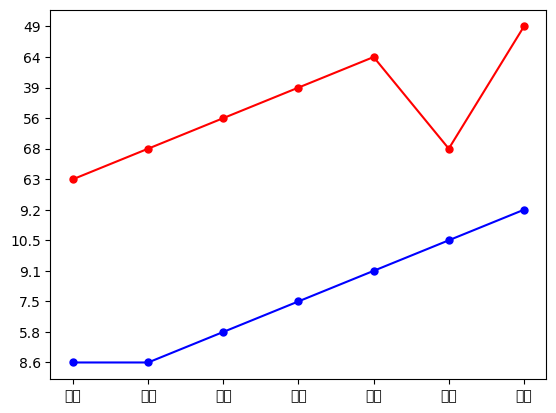

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt

req = requests.get("https://www.weather.go.kr/w/obs-climate/land/city-obs.do")
html = req.text
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table')
data = []
trs = table.find_all("tr")
city = []
temp = []
humidity = []
for tr in trs:
  tds = tr.find_all("td")
  for td in tds:
    if td.find('a') :
      city = tds[0].get_text()
      temp = tds[5].get_text()
      humidity = tds[10].get_text()
      data.append([city, temp, humidity])

import pandas as pd
city_list = ['서울','인천','대전','대구','광주','부산','울산']
df = pd.DataFrame(data, columns=['도시','기온','습도'])
df.set_index('도시', inplace=True)
city_df = df.loc[city_list]
print(city_df)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.plot(city_list, city_df['기온'], label='기온', c='b', linestyle='-', marker='.', markersize=10)
plt.plot(city_list, city_df['습도'], label='습도', c='r', linestyle='-', marker='.', markersize=10)
plt.xticks(range(len(city_list)), labels=city_list)
plt.yticks(None)
plt.show()
